## Домашнее задание по теме: "Feature Selection"

Описание задания:

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

### 1. Сгенерируйте данные с помощью кода:
```python
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
```

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
```python
cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()
```

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X, y = x_data_generated, y_data_generated

print(f'Изначальное количество признаков: {X.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X, y, scoring='accuracy').mean()}")

Изначальное количество признаков: 20
Cредняя точность модели: 0.8800000000000001


### 3. Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(data=X)
df['Target'] = y

Text(0.5, 1.0, 'Correlation Matrix')

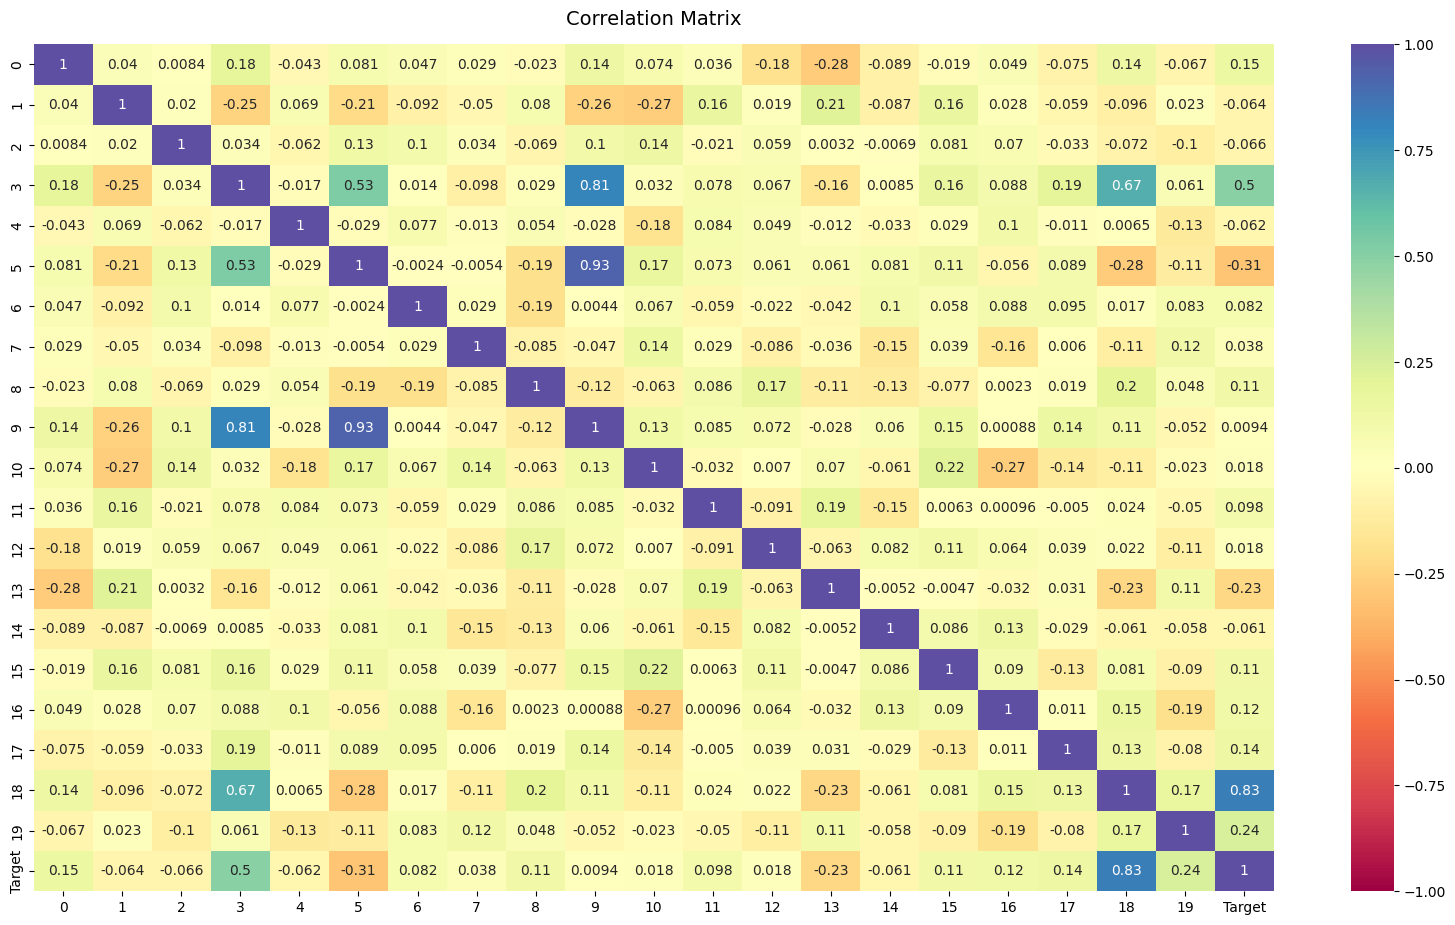

In [ ]:
# корреляционная матрица
plt.figure(figsize=(20, 11))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':14}, pad=14)

Видна сильная корреляция между парами признаков признаками: `3 - 5`, `3 - 9`, `3 - 18`, `5 - 9`.

In [ ]:
# удаление признаков с высокой корреляцией
df_new = df.drop([5, 9], axis=1)

# разделение данных
X_new = df_new.drop(['Target'], axis=1)

print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 18
Cредняя точность модели: 0.9


In [ ]:
# удаление низковариативных признаков
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.1)
X_new = selector.fit_transform(X_new)

print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 4
Cредняя точность модели: 0.95


### 4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# использование скоринговой функции
X_new = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)

print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 5
Cредняя точность модели: 0.9400000000000001


### 5. Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# отбор признаков с помощью логистической регрессии
lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42).fit(X, y)
clf = SelectFromModel(lr, prefit=True)

X_new = clf.transform(X)
print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 9
Cредняя точность модели: 0.9299999999999999


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# отбор признаков с помощью модели RandomForest
rf = RandomForestClassifier(max_features=5, random_state=42)
rf.fit(X, y)

# отбираем признаки с наибольшей важностью
importances = rf.feature_importances_
threshold = 0.1
X_new = X[:, importances > threshold]

print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 2
Cредняя точность модели: 0.9400000000000001


### 6. Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

# последовательный перебор признаков (с KNN в качестве оценщика)
features_count = 5
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=features_count)
sfs.fit(X, y)
sfs.get_support()

X_new = sfs.transform(X)
print(f'Количество признаков после отбора: {X_new.shape[1]}')

# получение метрики
print(f"Cредняя точность модели: {cross_val_score(LogisticRegression(random_state=42), X_new, y, scoring='accuracy').mean()}")

Количество признаков после отбора: 5
Cредняя точность модели: 0.97


### 7. Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

|способ выбора признаков|количество признаков|средняя точность модели|
| - | - | - |
| без отбора | 20 | 0.88 |
| корреляционная матрица | 18 | 0.9 |
| корреляционная матрица + низковариативные признаки | 4 | 0.95 |
| дисперсионный анализ | 5 | 0.94 |
| логистическая регрессия | 9 | 0.93 |
| случайный лес | 2 | 0.94 |
| перебор | 5 | 0.97 |

Из таблицы видно, что отбор признаков сильно улучшает итоговую метрику, это важная часть работы в задачах ML.